In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats

(array([4.50269891e+19]), array([0.]))

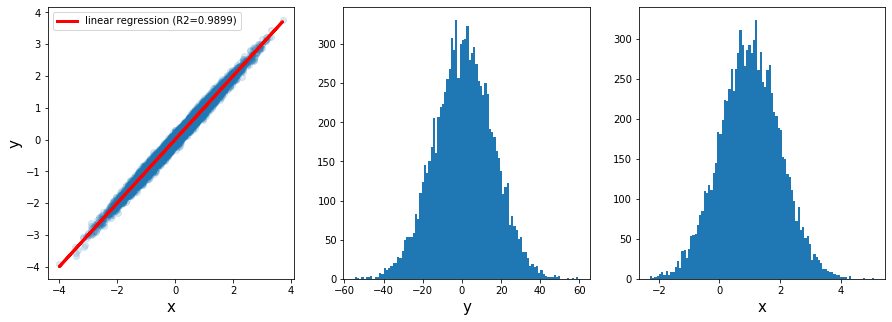

In [136]:
num_samples = 10000

x = np.random.normal(loc=0, scale=1, size=num_samples)
coef = 1
intercept = 0
y = intercept + coef * x + np.random.normal(loc=0, scale=0.1, size=num_samples)

X = np.vstack(x)
model_slope = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
model_y = model_slope * x
r2 = round(r2_score(y, model_y),4)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.scatter(x, y, alpha=0.15)
ax1.plot(x, model_y, color='red', linewidth=3, label='linear regression (R2={})'.format(r2))
ax1.set_ylabel('y', fontsize=15)
ax1.set_xlabel('x', fontsize=15)
ax1.legend()

ax2.hist(max_dead_lift, bins=100)
ax2.set_xlabel('y', fontsize=15)

ax3.hist(weight_kg, bins=100)
ax3.set_xlabel('x', fontsize=15)
# stats.ttest_1samp(model_y, 1)


In [141]:
model_slope

array([1.00080693])

In [144]:
params = [0, model_slope[0]]
newX = np.append(np.ones((len(X),1)), X, axis=1)
MSE = (sum((y-model_y)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

In [147]:
print(params)
print(p_values)

[0.     1.0008]
[1. 0.]


Text(-2, 2.7, 'm=(-1)')

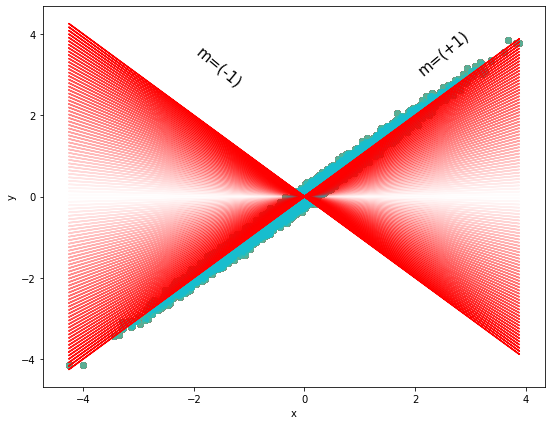

In [83]:
minmax = 1
slopes = np.linspace(-minmax, minmax, 100)

fig, ax = plt.subplots(figsize=(9, 7))
for s in slopes:
    mody = s*x
    ax.scatter(x, y, alpha=0.5)
    ax.plot(x, mody, color='red', alpha=abs(s))
    
ax.set_ylabel('y')
ax.set_xlabel('x')

ax.text(x=2, y=3, s='m=(+1)', rotation=40, fontsize=15)
ax.text(x=-2, y=2.7, s='m=(-1)', rotation=-40, fontsize=15)

In [148]:
pvals = []
for s in slopes:
    mody = s*x
    params = [0, s]
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y-mody)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]
    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)
    pvals.append(p_values[-1])

In [149]:
pvals

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.003,
 0.32,
 0.311,
 0.002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [121]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()


In [122]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.023e+06
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:10:02   Log-Likelihood:                 8840.5
No. Observations:               10000   AIC:                        -1.768e+04
Df Residuals:                    9998   BIC:                        -1.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.164      0.8

In [127]:
results.params = [-1.5, 'your mom']

In [128]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.023e+06
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:12:11   Log-Likelihood:                 8840.5
No. Observations:               10000   AIC:                        -1.768e+04
Df Residuals:                    9998   BIC:                        -1.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.164      0.8

In [129]:
results.params

[-1.5, 'your mom']